<a href="https://colab.research.google.com/github/Mehmteren/MachineLearningExamples/blob/main/ML3_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


In [ ]:
hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df=df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary","League" ,"Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N" ]]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel="linear").fit(x_train, y_train)


In [ ]:
svr_model.predict(x_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [ ]:
print("y ={0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y =-48.69756097561513 + 4.969512195122093 x


In [ ]:
x_train["Hits"][0:1]

,Hits
183,91.0


In [ ]:
y_pred = svr_model.predict(x_train)


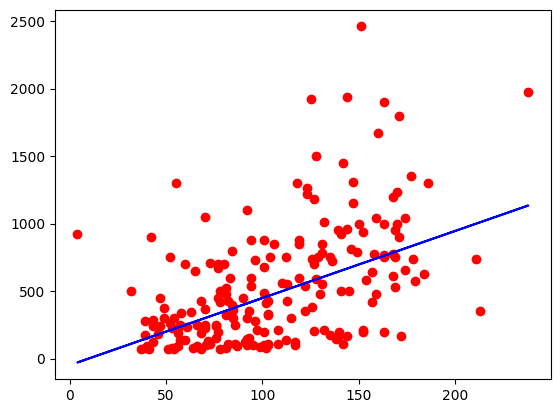

In [ ]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, y_pred, color="blue")


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm_model = LinearRegression().fit(x_train, y_train)

In [ ]:
lm_pred =lm_model.predict(x_train)

In [ ]:
print("y ={0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y =-8.814095480334345 + 5.172456135470686 x


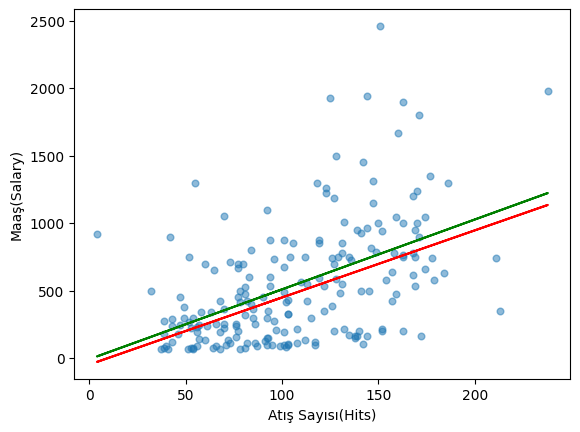

In [ ]:
plt.scatter(x_train, y_train, alpha=0.5, s = 23)
plt.plot(x_train, lm_pred, "g")
plt.plot(x_train,y_pred, "r")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")
plt.show()

In [ ]:
#Tahmin

In [ ]:
svr_model.predict([[91]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(x_test, y_pred))

439.6853326219471

In [ ]:
svr_model

SVR(kernel='linear')

In [ ]:
#ModelTuning

In [ ]:
svr_params = {"C": [0.1,0.5,1,3]}

In [ ]:
svr_cv_model= GridSearchCV(svr_model, svr_params, cv=5).fit(x_train, y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

<ipython-input-40-1316d66713aa>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Series(svr_cv_model.best_params_)[0]


0.1

In [ ]:
from sklearn.svm import SVR

best_C = pd.Series(svr_cv_model.best_params_).iloc[0]

svr_tuned = SVR(kernel="linear", C=best_C).fit(x_train, y_train)

In [ ]:
y_pred  = svr_tuned.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116